In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd

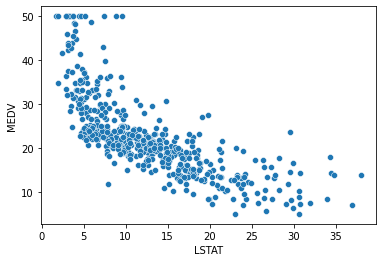

In [2]:
boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_boston = pd.concat([dfX, dfy], axis=1)

# 인구 중 하위계층의 비율(LSTAT)과 주택가격(MEDV)
sns.scatterplot(x="LSTAT", y="MEDV", data=df_boston)
plt.show()

In [3]:
import statsmodels.api as sm

model1 = sm.OLS.from_formula("MEDV ~ LSTAT", data=df_boston)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           5.08e-88
Time:                        09:35:47   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

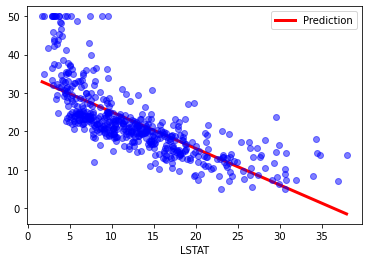

In [4]:
y_hat1 = result1.predict(df_boston)
df1 = pd.concat([y_hat1, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df1.columns = ["Prediction", "LSTAT"]
df1.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.5)
plt.show()

In [5]:
# LSTAT을 제곱한 비선형 독립변수를 추가한 모형

model2 = sm.OLS.from_formula("MEDV ~ LSTAT + I(LSTAT**2)", data=df_boston)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          1.56e-112
Time:                        09:38:33   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149

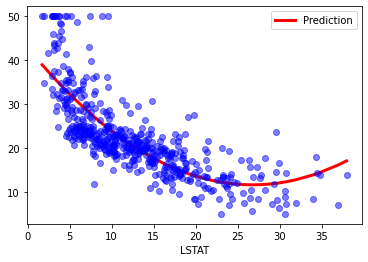

In [6]:
y_hat2 = result2.predict(df_boston)
df2 = pd.concat([y_hat2, df_boston.LSTAT], axis=1).sort_values("LSTAT")
df2.columns = ["Prediction", "LSTAT"]
df2.plot(x="LSTAT", style="r-", lw=3)
plt.plot(df_boston.LSTAT, df_boston.MEDV, "bo", alpha=0.5)
plt.show()

In [ ]:
# 탐색적 데이터 분석 : 산점도 행렬 그래프를 그려보는 등 분석 전에 모형을 만들어서 평가해보는 것이 좋음

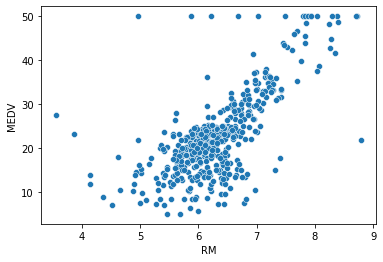

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64


In [7]:
# 방의 개수와 주택 가격의 상관관계

sns.scatterplot(x="RM", y="MEDV", data=df_boston)
plt.show()
print(df_boston["RM"])

In [8]:
model3 = sm.OLS.from_formula("MEDV ~ RM", data=df_boston)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           2.49e-74
Time:                        09:48:29   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

<AxesSubplot:xlabel='CAT_RM', ylabel='MEDV'>

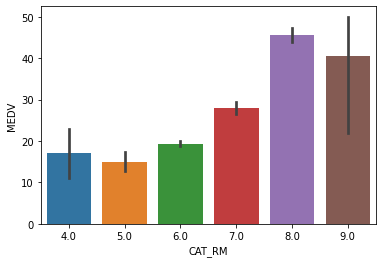

In [9]:
import numpy as np
df_boston["CAT_RM"] = np.round(df_boston.RM)
sns.barplot(x="CAT_RM", y="MEDV", data=df_boston)

In [10]:
# 연속수치형이었던 RM을 범주형으로 바꿈

model4 = sm.OLS.from_formula("MEDV ~ C(np.round(RM)) + 0", data=df_boston)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     115.8
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           3.57e-81
Time:                        09:49:56   Log-Likelihood:                -1645.6
No. Observations:                 506   AIC:                             3303.
Df Residuals:                     500   BIC:                             3329.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
C(np.round(RM))[4.0]    17.0200 

In [11]:
df = pd.read_csv("c:/data/energy/data.csv")
df.head()

,Unnamed: 0,Demand,Date
0,0,174.896295,2019-01-01
1,1,188.590935,2019-01-02
2,2,188.916891,2019-01-03
3,3,173.814244,2019-01-04
4,4,169.515175,2019-01-05


In [21]:
import datetime as dt

df['Date'] = pd.to_datetime(df["Date"])
df['Ordinal'] = df.Date.map(dt.datetime.toordinal)
df['Timestamp'] = df.Date.map(dt.datetime.timestamp)
df.head()

,Unnamed: 0,Demand,Date,Original,Timestamp,Year,Month,DayOfYear,DayOfMonth,DayOfWeek,WeekPfYear,IsMonthStart,IsMonthEnd,Ordinal
0,0,174.896295,2019-01-01,737060,1.546268e+09,2019,1,1,31,1,1,True,False,737060
1,1,188.590935,2019-01-02,737061,1.546355e+09,2019,1,2,31,2,2,False,False,737061
2,2,188.916891,2019-01-03,737062,1.546441e+09,2019,1,3,31,3,3,False,False,737062
3,3,173.814244,2019-01-04,737063,1.546528e+09,2019,1,4,31,4,4,False,False,737063
4,4,169.515175,2019-01-05,737064,1.546614e+09,2019,1,5,31,5,5,False,False,737064


In [22]:
model5 = sm.OLS.from_formula("Demand ~ scale(Original)", data=df)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.58
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           0.000739
Time:                        10:09:22   Log-Likelihood:                -1709.7
No. Observations:                 365   AIC:                             3423.
Df Residuals:                     363   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         221.2775      1.374    1

In [25]:
df["Year"] = df.Date.dt.year
df["Month"] = df.Date.dt.month
df["DayOfYear"] = df.Date.dt.dayofyear
df["DayOfMonth"] = df.Date.dt.daysinmonth
df["DayOfWeek"] = df.Date.dt.dayofweek
df["Weekday"] = df.Date.dt.weekday
df["WeekOfYear"] = df.Date.dt.weekday
df["IsMonthStart"] = df.Date.dt.is_month_start
df["IsMonthEnd"] = df.Date.dt.is_month_end
df.tail()

,Unnamed: 0,Demand,Date,Original,Timestamp,Year,Month,DayOfYear,DayOfMonth,DayOfWeek,WeekPfYear,IsMonthStart,IsMonthEnd,Ordinal,Weekday,WeekOfYear
360,360,173.727990,2019-12-27,737420,1.577372e+09,2019,12,361,31,4,4,False,False,737420,4,4
361,361,188.512817,2019-12-28,737421,1.577459e+09,2019,12,362,31,5,5,False,False,737421,5,5
362,362,191.273009,2019-12-29,737422,1.577545e+09,2019,12,363,31,6,6,False,False,737422,6,6
363,363,186.240144,2019-12-30,737423,1.577632e+09,2019,12,364,31,0,0,False,False,737423,0,0
364,364,186.370181,2019-12-31,737424,1.577718e+09,2019,12,365,31,1,1,False,True,737424,1,1


In [26]:
formula = """
Demand ~ scale(Ordinal) + C(Month) + 0 + DayOfYear + C(DayOfMonth) + 0 + C(DayOfWeek) + 0 + C(Weekday) + 0 + C(IsMonthStart) + 0 + C(IsMonthEnd) + 0
"""
model6 = sm.OLS.from_formula(formula, data=df)
result6 = model6.fit()
print(result6.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     19.98
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           4.74e-46
Time:                        10:10:23   Log-Likelihood:                -1574.8
No. Observations:                 365   AIC:                             3192.
Df Residuals:                     344   BIC:                             3273.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
C(Month)[1]               

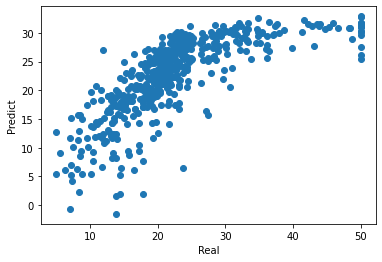

In [27]:
plt.scatter(boston.target, y_hat1)
plt.xlabel("Real")
plt.ylabel("Predict")
plt.show()

In [29]:
# 종속변수에 제곱근을 넣음

model11 = sm.OLS.from_formula("np.sqrt(MEDV) ~ LSTAT", data=df_boston)
result11 = model1.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 07 Dec 2021   Prob (F-statistic):           5.08e-88
Time:                        10:13:49   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

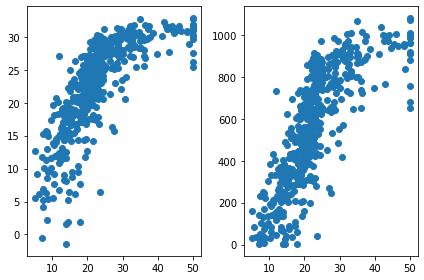

In [30]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.subplot(122)
plt.scatter(boston.target, (result11.predict(df_boston))**2)
plt.tight_layout()
plt.show()

In [33]:
# 종속변수에 np.log()를 넣음

model12 = sm.OLS.from_formula("np.log(MEDV) ~ LSTAT", data=df_boston)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     928.1
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          2.23e-116
Time:                        10:16:13   Log-Likelihood:               -0.57634
No. Observations:                 506   AIC:                             5.153
Df Residuals:                     504   BIC:                             13.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6176      0.022    164.654      0.0

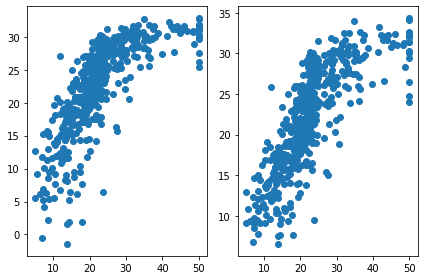

In [34]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.subplot(122)
plt.scatter(boston.target, np.exp(result12.predict(df_boston)))
plt.tight_layout()
plt.show()

In [35]:
model13 = sm.OLS.from_formula("np.log(MEDV) ~ np.log(LSTAT)", data=df_boston)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1058.
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          7.32e-126
Time:                        10:18:09   Log-Likelihood:                 21.325
No. Observations:                 506   AIC:                            -38.65
Df Residuals:                     504   BIC:                            -30.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3618      0.042    103.603

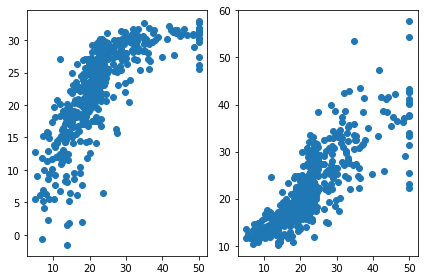

In [36]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.subplot(122)
plt.scatter(boston.target, np.exp(result13.predict(df_boston)))
plt.tight_layout()
plt.show()

<AxesSubplot:>

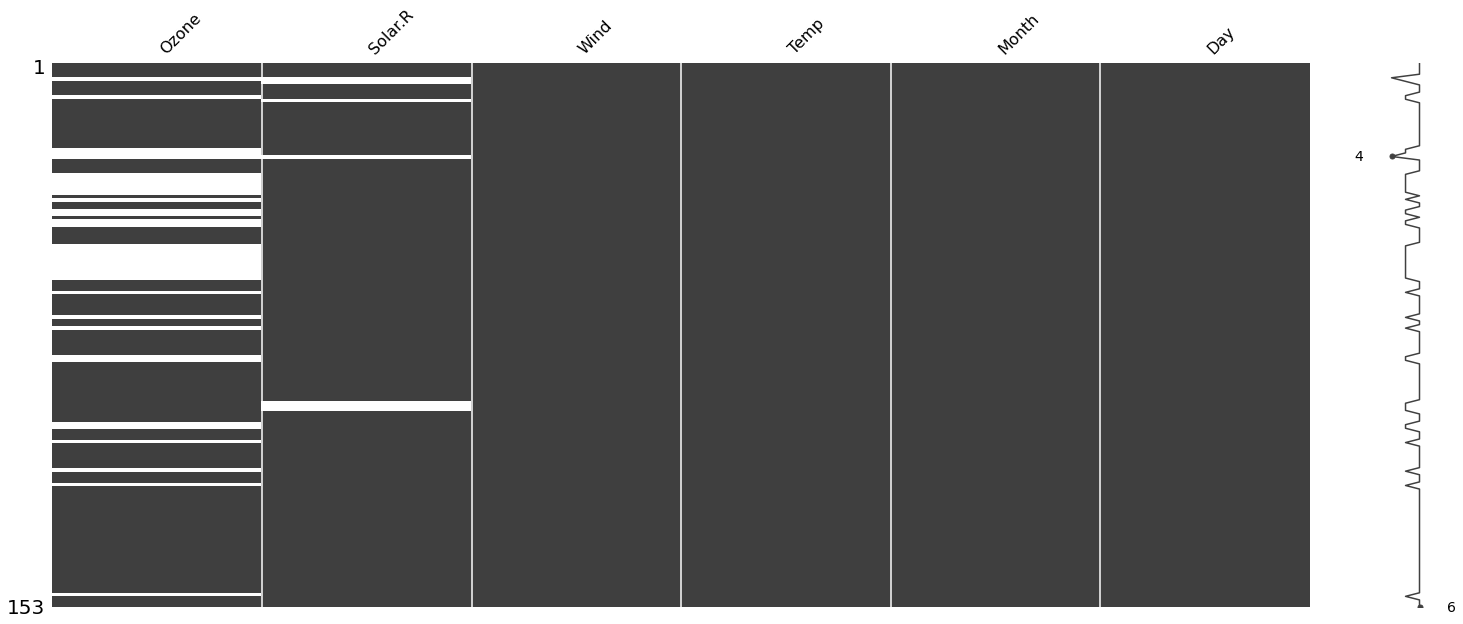

In [37]:
df = pd.read_csv("c:/data/ozone/ozone.csv")

import missingno as msno

msno.matrix(df)

In [38]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [40]:
X = df[["Solar.R", "Wind", "Temp"]]
y = df["Ozone"]

In [41]:
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Ozone   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.828
Method:                 Least Squares   F-statistic:                              246.7
Date:                Tue, 07 Dec 2021   Prob (F-statistic):                    9.03e-58
Time:                        10:38:34   Log-Likelihood:                         -682.21
No. Observations:                 153   AIC:                                      1370.
Df Residuals:                     150   BIC:                                      1380.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Solar.R        0.0600      0.020      2.969      0.003       0.020       0.100
Wind          -3.4514      0.408     -8.459      0.000      -4.258      -2.645
Temp           0.8430      0.071     11.820      0.000       0.702       0.984
==============================================================================
Omnibus:                       40.837   Durbin-Watson:                   1.639
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.840
Skew:                           1.210   Prob(JB):                     4.60e-18
Kurtosis:                       5.581   Cond. No.                         52.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
result.predict([92, 15.5, 84])

array([22.82932997])

In [43]:
result.save("c:/data/ozone/ozone_regress.model")

In [45]:
from statsmodels.regression.linear_model import OLSResults

model = OLSResults.load("c:/data/ozone/ozone_regress.model")
model.predict([92, 15.5, 84])

array([22.82932997])